# Visualização de dados em Python: a biblioteca Seaborn

Código abaixo é baseado na [documentação da biblioteca](https://seaborn.pydata.org/tutorial.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

Considere o conjunto de dados **tips**

In [2]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Há relação entre o total da conta e o total de gorjeta?

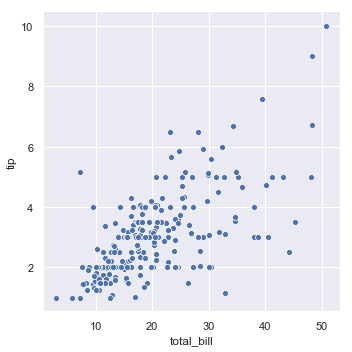

In [3]:
_ = sns.relplot(x = 'total_bill', y = 'tip', data = tips)

Bom, poderíamos fazer isso usando pandas facilmente!

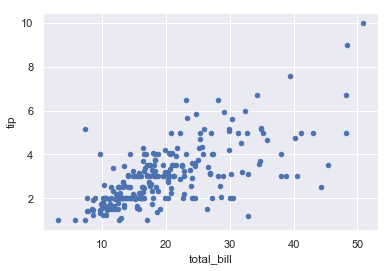

In [7]:
_ = tips.plot.scatter('total_bill', 'tip')

### Mas Seaborn fica mais interessante quando tempos perguntas mais elaboradas

Há diferença de comportamento entre fumantes e não fumantes?
Vamos verificar isso modificando a aparência de cor para essas duas categorias.

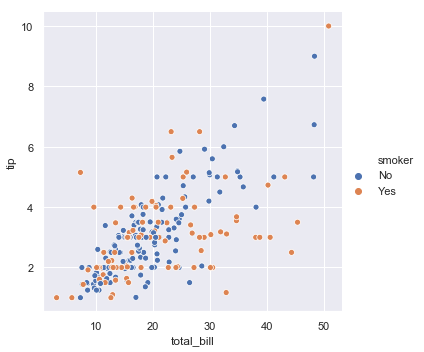

In [4]:
_ = sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips)

Há diferença de comportamento entre fumantes e não fumantes dependendo do horário da refeição? Vamos verificar isso modificando também o estilo de cada ponto.

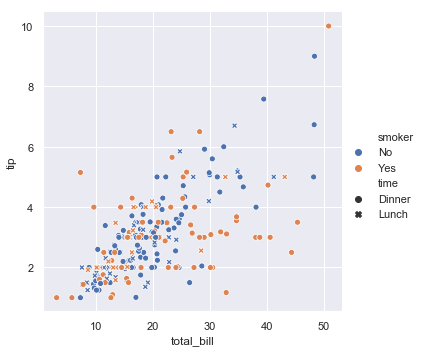

In [5]:
_ = sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

É possível utilizar a aparência de cor com atributos numéricos

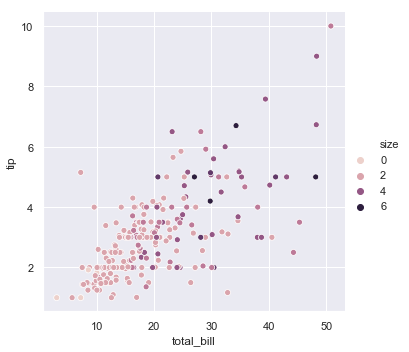

In [6]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

### Gráficos de linha também são fáceis!

In [7]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,-2.542773
1,1,-1.681495
2,2,-3.246339
3,3,-4.240550
4,4,-3.848346


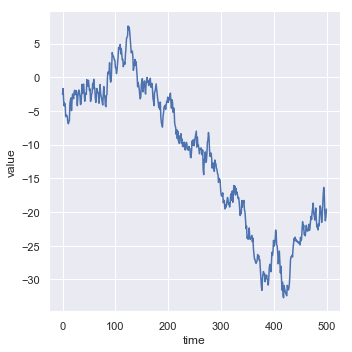

In [8]:
_ = sns.relplot(x="time", y="value", kind="line", data=df)

Pode-se considerar incertezas. Em algumas situações, o mesmo valor de $x$ pode estar associado a vários valores de $y$. Nesse caso, por padrão, seaborn faz agregação via média e intervalo de confiança.

In [10]:
fmri = pd.read_csv('fmri.csv')
fmri.head(5)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [11]:
fmri[(fmri.timepoint == 18) & (fmri.event == 'stim')]

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557
10,s4,18,stim,parietal,-0.048812


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


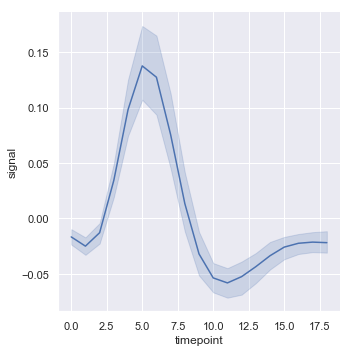

In [12]:
# o intervalo de confiança é calculado automaticamente via Bootstrap
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

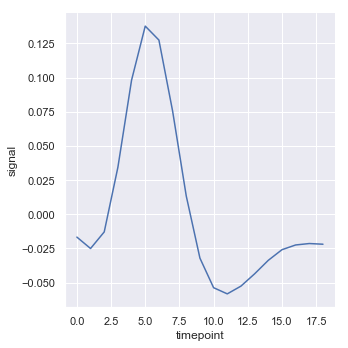

In [16]:
# O intervalo de confiança pode ser facilmente removido
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

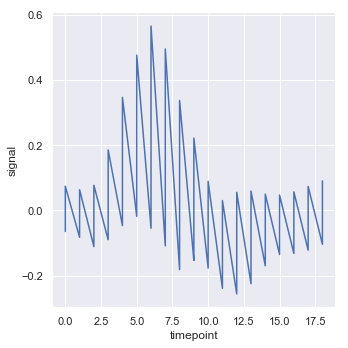

In [17]:
# Se quisermos, podemos visualizar os dados originais
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

Novamente, pode-se discriminar as linhas de acordo com categorias. Isso pode ser feito pela aparência de cor (hue) ou pelo estilo (style).

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


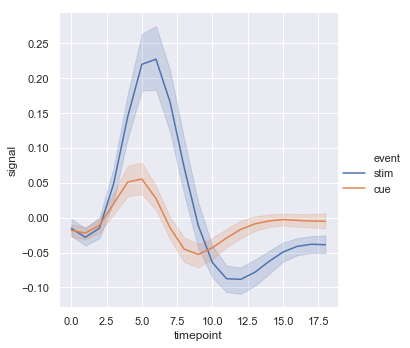

In [18]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


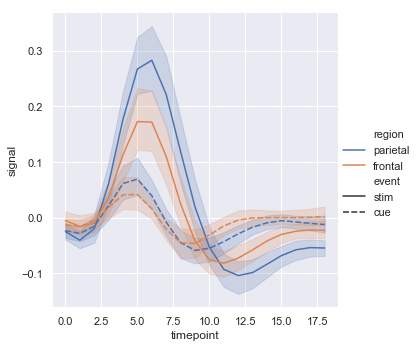

In [19]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


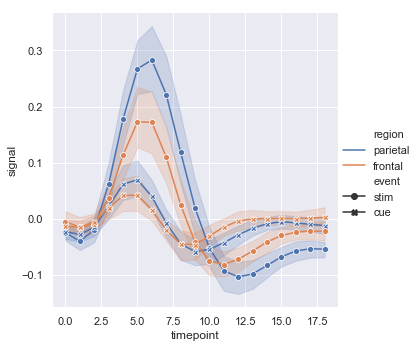

In [20]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

E se você quiser visualizar todas as unidades amostrais?

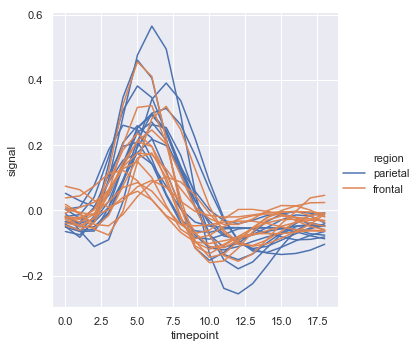

In [21]:
# O que faz esse código?
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

### Há várias paletas de cores

In [22]:
dots = pd.read_csv('dots.csv').query("align == 'dots'")
dots.head(5)

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


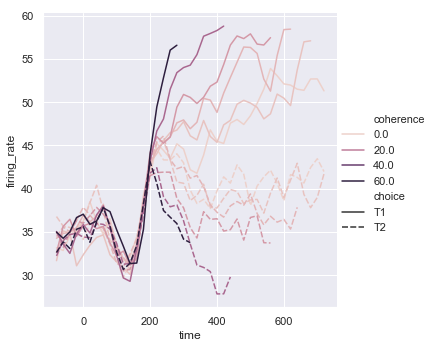

In [23]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

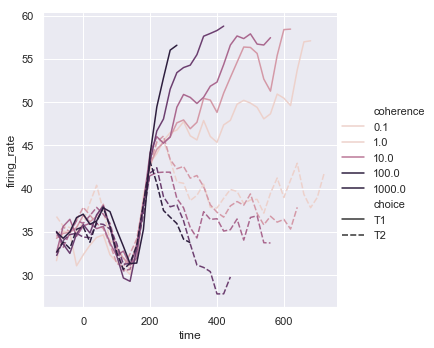

In [24]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

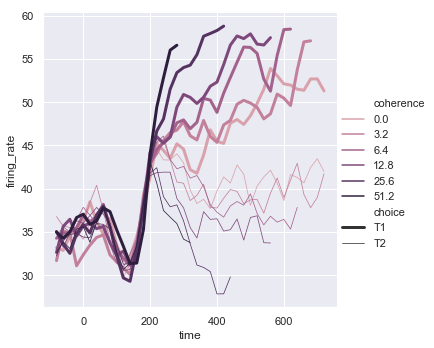

In [25]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

### Também é muito fácil de visualizar séries temporais

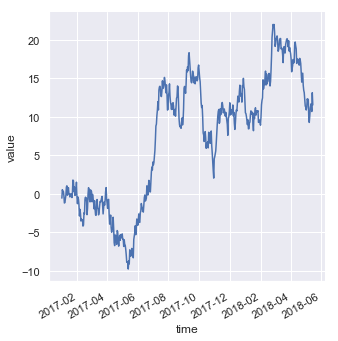

In [26]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

### Pode-se discriminar dados em áreas diferentes

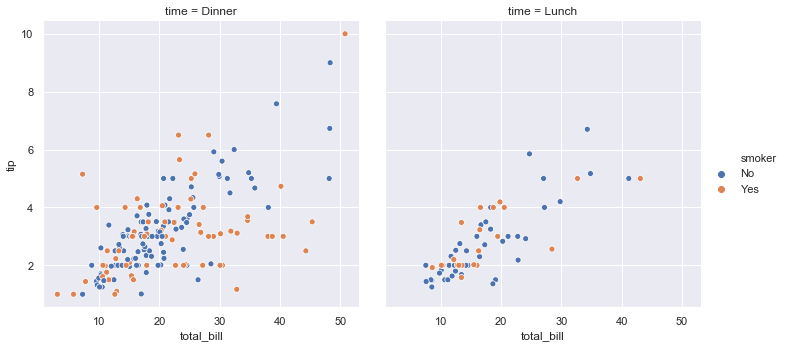

In [27]:
# veja a utilização do parâmetro 'col'
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

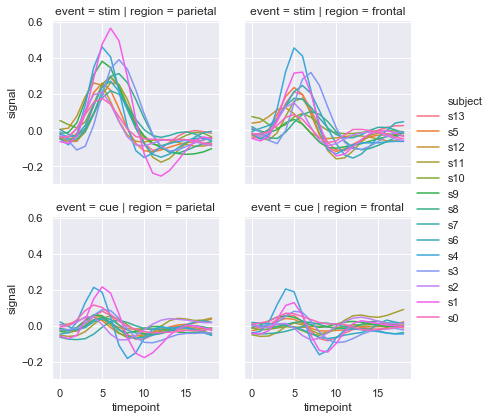

In [28]:
# Aqui, combina-se 'col' e 'row'
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

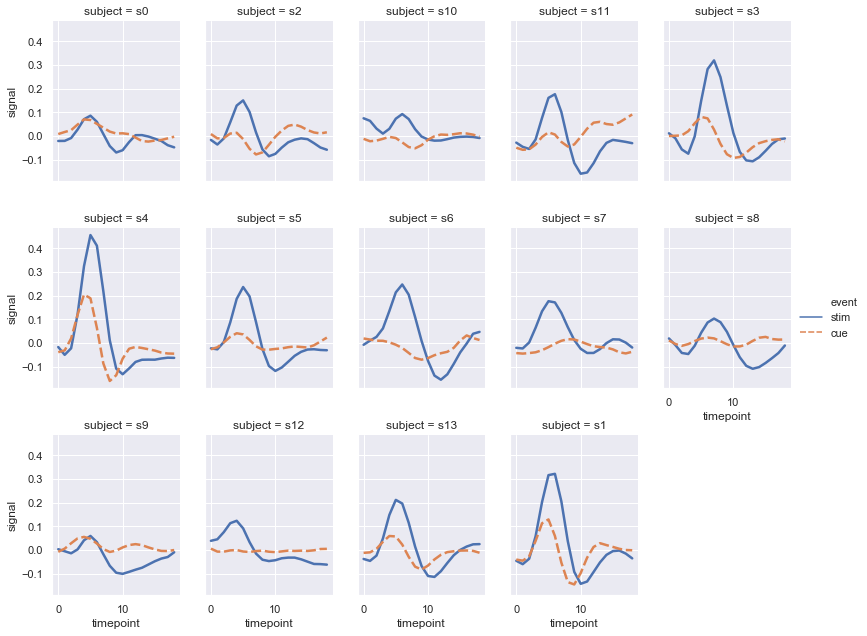

In [29]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

## Boxplot

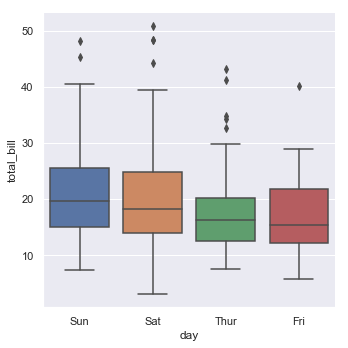

In [30]:
# boxplot simples
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

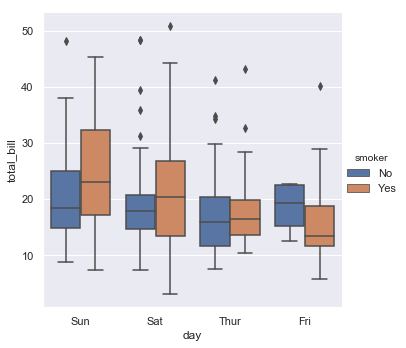

In [31]:
# discriminando, por meio da cor, entre fumantes e não fumantes
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

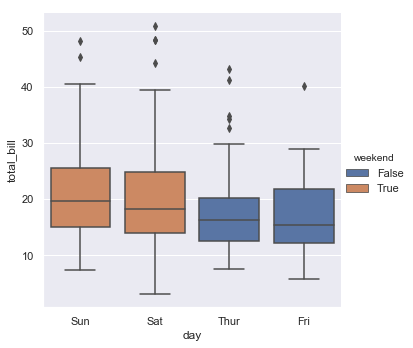

In [32]:
# Mesmo gráfico, mas agora discriminando por fim de semana
# uma nova coluna foi gerada!
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

### Violin plot

Violin plots combinam a ideia de BoxPlot com estimadores de densidade

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


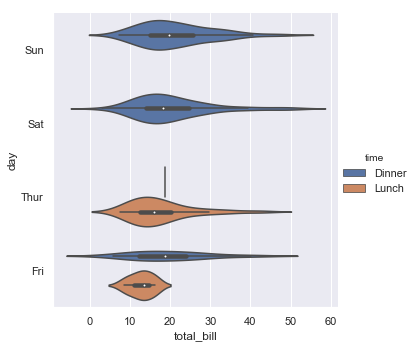

In [33]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


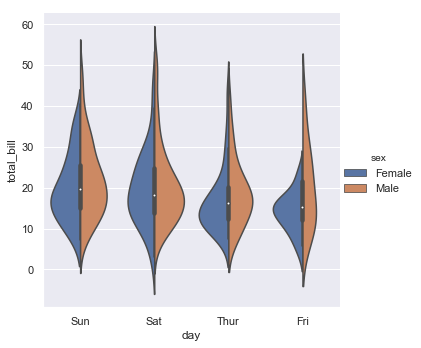

In [34]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

### Gráficos de barra

In [ ]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

In [ ]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

In [ ]:
titanic = titanic.sort_values(by = 'deck')
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

### Visualizando distribuições

### Histogramas

In [ ]:
x = np.random.normal(size=100)
ax = sns.distplot(x);
#ax.set(xlabel='common xlabel', ylabel='common ylabel')

In [ ]:
ax = sns.distplot(x, rug = True);

In [ ]:
ax = sns.kdeplot(x, shade = True);

### Distribuições bivariadas

In [ ]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

In [ ]:
sns.jointplot(x="x", y="y", data=df);

In [ ]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="hex", color="green");

In [ ]:
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="green");

In [ ]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

### Visualizando relacionamentos entre vários pares de variáveis

In [ ]:
iris = pd.read_csv("iris.csv")
iris.head()

In [ ]:
sns.pairplot(iris);

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);